In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [2]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import cross_validation
from implementations import ridge_regression
from cost import compute_loss
from plots import plot_cross_validation

### Load train and test data

In [3]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [4]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [5]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 1
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 2

In [6]:
# get train and test data
train_index = jet_train_samples[2]
x, y = X[train_index], Y[train_index]

### Best degree

In [7]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

1 73.34390221486996 73.31541218637993
2 76.93594338755628 76.8775847808106
3 79.21468615017002 79.07223600771988
4 80.27065527065527 80.11993382961126
5 80.44067640841835 80.27708850289496
6 80.62218546089514 80.38323683484973
7 81.54857090340961 81.26826578439481
8 82.5323959194927 82.26220016542598
9 82.88576417608675 82.64267990074441
10 82.92620163587905 82.64681555004135
11 83.01672640382318 82.74331403363661
12 83.11598198694972 82.87151916184175
13 83.26027019575407 82.9652605459057
14 82.35134638360445 82.03060380479735
15 81.8307140887786 80.46043562172595
16 81.38911864718317 64.73393989523021
17 80.03124712802132 68.10862972153294
18 73.83190883190883 66.78108629721532
19 64.68431210366694 56.905155776123514


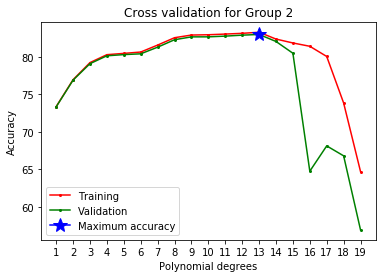

In [8]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.plot(best_degree, max_accuracy, label="Maximum accuracy", marker = '*', markersize=14, color = "blue")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees")
plt.ylabel("Accuracy")
plt.title("Cross validation for Group 2")
plt.legend()
plt.savefig("degree_group2")
plt.show()

### Best lambda

In [9]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

1e-08 81.53019023986766 52.87151916184174
1e-07 82.01773734031799 48.85718224427902
1e-06 82.04117268633398 63.53598014888337
1e-05 81.97316423122875 77.29252826027019
0.0001 77.58753791011856 76.0752688172043
0.001 83.26027019575407 82.9652605459057
0.01 82.57329289587354 82.32423490488006


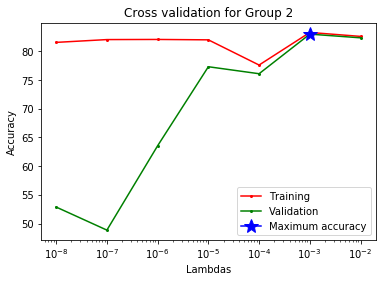

In [10]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, label="Maximum accuracy", marker = '*', markersize=14, color = "blue")
plt.xlabel("Lambdas")
plt.ylabel("Accuracy")
plt.title("Cross validation for Group 2")
plt.legend()
plt.savefig("lambda_group2")
plt.show()